# Making beautiful figures with Python

There are many programs out there to make beautiful looking visualizations for your data.  This notebook is designed to show off some more of the the options that are availiable to you in python.  Most of the time, when you're just wanting a quick visualization of your data, you won't care about the more advanced tweaking of plots, you just want to be able to see what's going on.  So the first part of this notebook will focus on just quickly visualizing your data, and the second part will have some mroe advanced options for making your graphs beautiful.  If I have time to write it, there will also be a third part to introduce you to some other python libraries for making nice looking figures.

## Part 1: Basic Data Visualization

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
%matplotlib widget

### Line Plots

In [ ]:
plt.plot?

In [117]:
x = np.linspace(0,2*np.pi,100)

In [120]:
plt.figure()
plt.plot(x)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [121]:
ySin = np.sin(x)
yCos = np.cos(x)

In [122]:
plt.figure()
plt.plot(x,ySin)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Matplotlib will automatically cycle through colors as you add more lines to the plot, but we can also choose which color we want the line to be by using the "color" keyword argument.
The values that can be used here can be a set of pre-defined settings in matplotlib, or you can use hex strings or a tuple for rgb colors.

|Color|Code|
|---|---|
|blue|b|
|green|g|
|red|r|
|cyan|c|
|magenta|m|
|yellow|y|
|black|k|
|white|w|
|hex color (red) |'#DE001A'|
|rgba color (green)| [0,0.49,0.29,1] |

The value for the rgba needs to be between 0 and 1, with index 0 being for r, 1 for green, 2 for blue, and 3 for the alpha value.

In [123]:
plt.figure()
plt.plot(x,ySin,color='#DE001A')
plt.plot(x,yCos,color=[0,0.49,0.29,1])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

We can also create a nice legend by giving the individual lines labels with the "label=" keyword, which matplotlib uses to generate the legend.  If you don't choose where to put the legend, matplotlib will automatically place it in the area with the most space. You can specify position with the "loc" keyword in the legend command.  

In [124]:
plt.close('all')
plt.figure()
plt.plot(x,ySin,color='#DE001A',label='Sine')
plt.plot(x,yCos,color=[0,0.49,0.29,1],label='Cosine')
plt.legend(loc='lower left')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

There are a lot of options availiable for customizing your plots in matplotlib.  To make a lot of them availiable, it requires the figure to be assigned to a variable.  My prefered formating for publication plots is shown below.

In [125]:
plt.figure()
ax = plt.subplot(111)
plt.subplots_adjust(bottom=0.1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.tick_params(bottom=True , top=False ,left=True ,right=False ,labelbottom=True ,labelleft=True)

ax.plot(x,ySin,'o',color='#05CAC7')
ax.set_xlim([0,3.15])
ax.set_ylim([0,1.1])
plt.xlabel('Time')
plt.ylabel('Intensity')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'Intensity')

You can use some LaTeX markup in the labels on matplotlib figures.  And you can choose where the label sits using the lavel coordinates, where the bottom left is (0,0) and the top right is (1,1)

In [126]:
plt.xlabel('cm$^{-1}$')
plt.ylabel('$\mu$')
ax.xaxis.set_label_coords(.9,-0.065)

### Scatter Plots

While above we made a scatter plot using the plt function, we can also use the scatter function, which adds more customizability to the plot.

In [ ]:
plt.scatter?

In [128]:
fid = open('plottingData/assignment3a2.dat','r')
raw = []
for i in fid:
    raw.append(float(i))
#raw

In [133]:
x = np.arange(len(raw))
c = np.random.rand(len(x))
plt.figure()
plt.scatter(x,raw,c=c)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

One example of the custimizability is the ability to specify the size of the points with an array the same size as the data.

In [137]:
plt.figure()
sizes = 1000 * np.random.rand(len(x))/6
plt.scatter(x,raw,c=c,s=sizes)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Histograms

The two important inputs in the histogram file are the data that you want in the histogram, and the number of bins "bins". For more information on what is availiable, run the following cell.

In [ ]:
plt.hist?

In [43]:
studentScores = (np.random.randn(500)*15)+80

In [49]:
plt.figure()
plt.hist(studentScores,rwidth=0.95);

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [48]:
plt.figure()
plt.hist(studentScores,bins=45,rwidth=.9);

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Violin Plots

In [ ]:
plt.violinplot?

In [54]:
import matplotlib.pyplot as plt

np.random.seed(10)
collectn_1 = np.random.normal(100, 10, 200)
collectn_2 = np.random.normal(80, 30, 200)
collectn_3 = np.random.normal(90, 20, 200)
collectn_4 = np.random.normal(70, 25, 200)

## combine these different collections into a list
data_to_plot = [collectn_1, collectn_2, collectn_3, collectn_4]

# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = ax.violinplot(data_to_plot)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [51]:
plt.violinplot(data_to_plot);

## Pie Chart

In [53]:
import matplotlib.pyplot as plt
transport_methodes = ['Car', 'Train', 'Bus', 'Walk']
transport_count = [23, 25, 10, 2] # e.g. total count of random survey
col = ['r', 'b', 'y', 'g'] 
plt.figure()
plt.pie(transport_count, labels=transport_methodes, colors=col,explode=[0,0,0.4,0], textprops={'color':'w'})

plt.title('Pie Chart')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Mosaic Plots

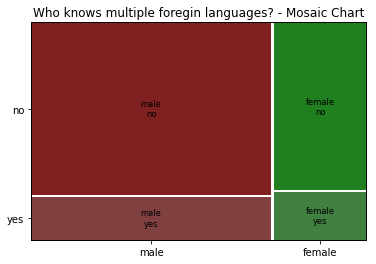

In [4]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import pylab
from itertools import product
import numpy as np
rand = np.random.random
speaks_mul_foreign_languages = list(product(['male', 'female'], ['yes', 'no']))
index = pd.MultiIndex.from_tuples(speaks_mul_foreign_languages, names=['male', 'female'])
data = pd.Series(rand(4), index=index)
mosaic(data, gap=0.01, title='Who knows multiple foregin languages? - Mosaic Chart')
pylab.show()

# Displaying 3 diminsional data

There are a few ways to show off data that you have that has information in 3 dimensions.  The simplist is by using a color map on a 2D graph.  THis can be done as seen in the scatter plot, but there will be cases where you want to show it as a heatmap, with a 2D array as pixels, and the values stored as the information on those pixels.

In [144]:
r = np.random.rand(30,30)

In [145]:
plt.figure()
plt.imshow(r,cmap=plt.get_cmap('seismic'))
plt.colorbar()

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Matplotlib also has a 3D plotting library that you can use to plot data in 3D space.

### 3D Scatter plot

In [147]:
x = np.random.rand(100)*100
y = np.random.rand(100)*100
z = np.random.rand(100)*100

fig = plt.figure()
ax = plt.axes(projection="3d")

ax.scatter3D(x,y,z,c=z,cmap='seismic')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### 3D Wireframe

In [156]:
fig = plt.figure()
ax = plt.axes(projection="3d")
x = np.linspace(-6,6,100)
y = np.linspace(-6,6,100)
X, Y = np.meshgrid(x,y)
def z_function(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))
Z = z_function(X, Y)
ax.plot_wireframe(X,Y,Z)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [154]:
plt.close('all')

### Surface Plot

In [159]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(X,Y,Z,cmap='seismic')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [163]:
plt.figure()
plt.imshow(Z)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Other plotting libraries

If you are interested in using python to make publication quality figures, there are other libraries availiable to use.  Some that I'm familiar with are:
 - bqplot
 - plotly
 
There are often libraries or even functions written by members of different communities that are specific to the type of figures used in that field, so don't feel like you have to stick with these general use libraries.  If there's a type of plot you want, it is likely you can find a library or function that produces one by doing the google search "[figure type you want] python 3"